# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [24]:
# Listing files within our working directory
import os
print(os.listdir(os.getcwd()))

['product_sales.csv', 'notebook.ipynb']


In [25]:
# Importing the necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Reading the the file as a DataFrame
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [27]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [28]:
# Imputing missing values with the mean, since this column is continuios, then checking for duplicates
df.dropna(inplace=True)
print(f'number of null values: {df.isnull().sum().sum()}')
print(f'number of duplicate values: {df.duplicated().sum()}')

number of null values: 0
number of duplicate values: 0


In [29]:
df['state'].unique()
# Everthing looks fine with this column.

array(['Kansas', 'Wisconsin', 'Illinois', 'Mississippi', 'Georgia',
       'Oklahoma', 'Massachusetts', 'Missouri', 'Texas', 'New York',
       'Maryland', 'California', 'Tennessee', 'North Dakota', 'Florida',
       'Michigan', 'North Carolina', 'Pennsylvania', 'Indiana', 'Hawaii',
       'Colorado', 'Louisiana', 'Virginia', 'Arkansas', 'Alaska',
       'Oregon', 'New Hampshire', 'Ohio', 'New Jersey', 'Connecticut',
       'Iowa', 'Montana', 'Washington', 'Arizona', 'Kentucky', 'Alabama',
       'Nebraska', 'South Carolina', 'Minnesota', 'South Dakota', 'Maine',
       'Utah', 'West Virginia', 'Vermont', 'New Mexico', 'Rhode Island',
       'Nevada', 'Delaware', 'Idaho', 'Wyoming'], dtype=object)

In [30]:
# Fixing sales_method column's inconsistent spelling and capitalization
print('unique values before cleaning:')
print(df['sales_method'].unique())
sales_method_dict = {'email': 'Email', 'em + call': 'Email + Call'}
df['sales_method'].replace(sales_method_dict, inplace=True)
print('-------------------------------------------------------')
print('unique values after cleaning:')
print(df['sales_method'].unique())
print('-------------------------------------------------------')
print(df['sales_method'].value_counts())

unique values before cleaning:
['Email + Call' 'Call' 'Email' 'em + call' 'email']
-------------------------------------------------------
unique values after cleaning:
['Email + Call' 'Call' 'Email']
-------------------------------------------------------
Email           6922
Call            4781
Email + Call    2223
Name: sales_method, dtype: int64


In [31]:
# Checking for customers that have 'years_as_customer' longer than 39 Years
print(df[df['years_as_customer'] > 39])
df.drop(df[df['years_as_customer'] > 39].index, axis=0, inplace=True)

       week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]


Summary of Data Validation:
Prior to cleaning, there were 15000 rows and 8 columns in this dataset. Here is a summary of each column:

week: Week is made up of 6 integers, 1-6. There are no more than 6 values in this column so it matches the description and no cleaning is need.

sales_method: 5 non-unique values with no missing values in the column. There were entries that included "em + call" and "email" which I substituted the originally given values of "Email + Call" and "Email" for respectively. After doing this,there are now only 3 options in sales_method ('Call + Email', 'Call', & 'Email'), which aligns with the given description.

customer_id: 15000 unique customer ids without missing values, matching given description.

nb_sold: numeric values without missing values. matches description, no cleaning needed.

revenue: there were 1,074 missing values in the revenue column that were dropped from the dataset.

years_as_customer: There were 2 outliers in the years_as_customer column. As a business, Pens and Printers has only been around for ~39 years, so those with values of 47 & 63 in this column, needed to be removed as they were outliers and likely bad data. I dropped those 2 rows as seen above.

nb_site_visits: Numeric values, none missing, already in integer format so doesn't need to be cleaned.

state: Character values without missing values, 50 unique values. Does not need cleaning.

After cleaning this dataset, there are now 13,924 rows and 8 columns, this is due to us dropping those with missing rows in the revenue column as well as dropping the two extreme outliers in the 'years_as_customer' column.

In [32]:
# Descovering some statistical facts about numerical columns
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.describe().round(2)
# The years_as_customer column appears to have outliers

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13924.00,13924.00,13924.00,13924.00,13924.00
mean,3.08,10.04,93.94,4.97,24.95
std,1.65,1.79,47.44,5.01,3.49
min,1.00,7.00,32.54,0.00,12.00
25%,1.00,9.00,52.47,1.00,23.00
50%,3.00,10.00,89.50,3.00,25.00
75%,4.00,11.00,107.33,7.00,27.00
max,6.00,16.00,238.32,39.00,37.00


Text(0.5, 1.0, 'Distribution of revenue')

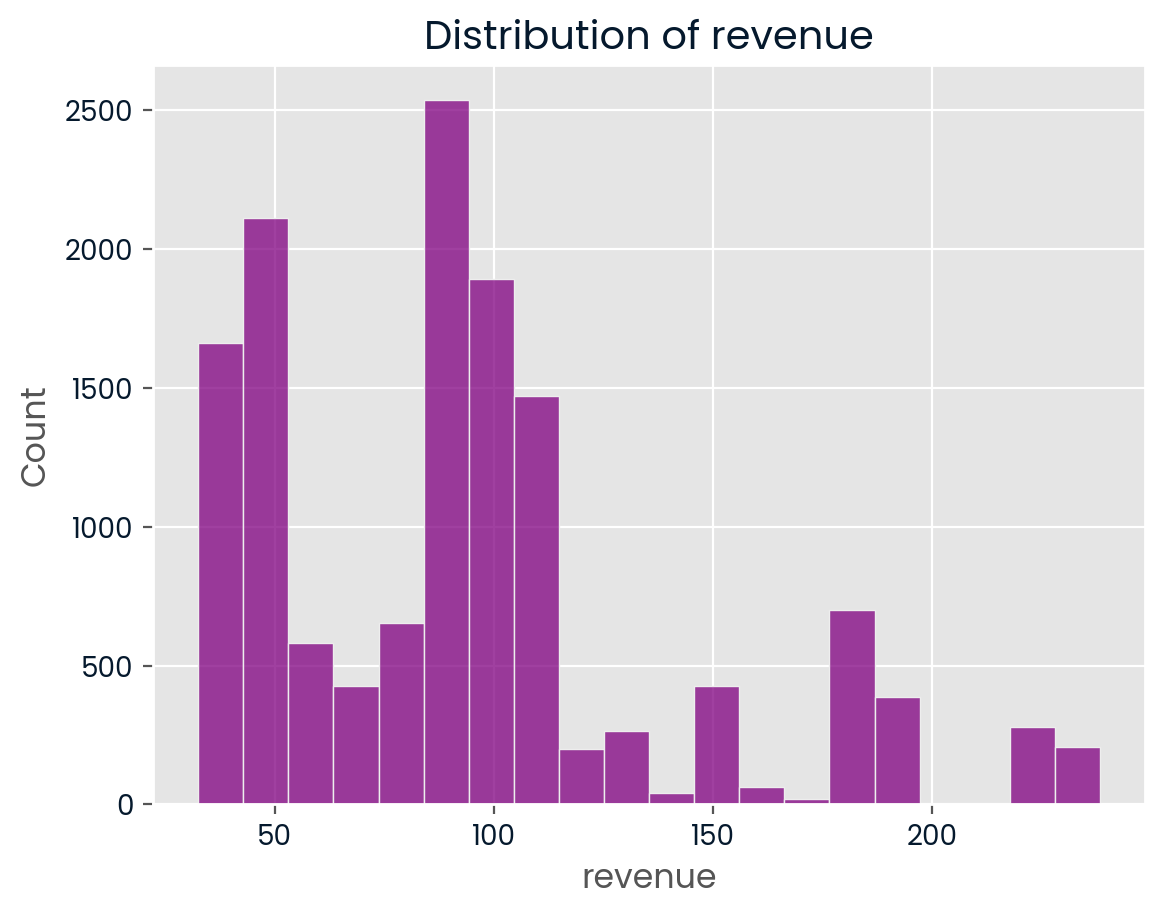

In [33]:
sns.histplot(x='revenue', data=df, bins=20, color='purple')
plt.title('Distribution of revenue')

Text(0, 0.5, 'number_of_customers')

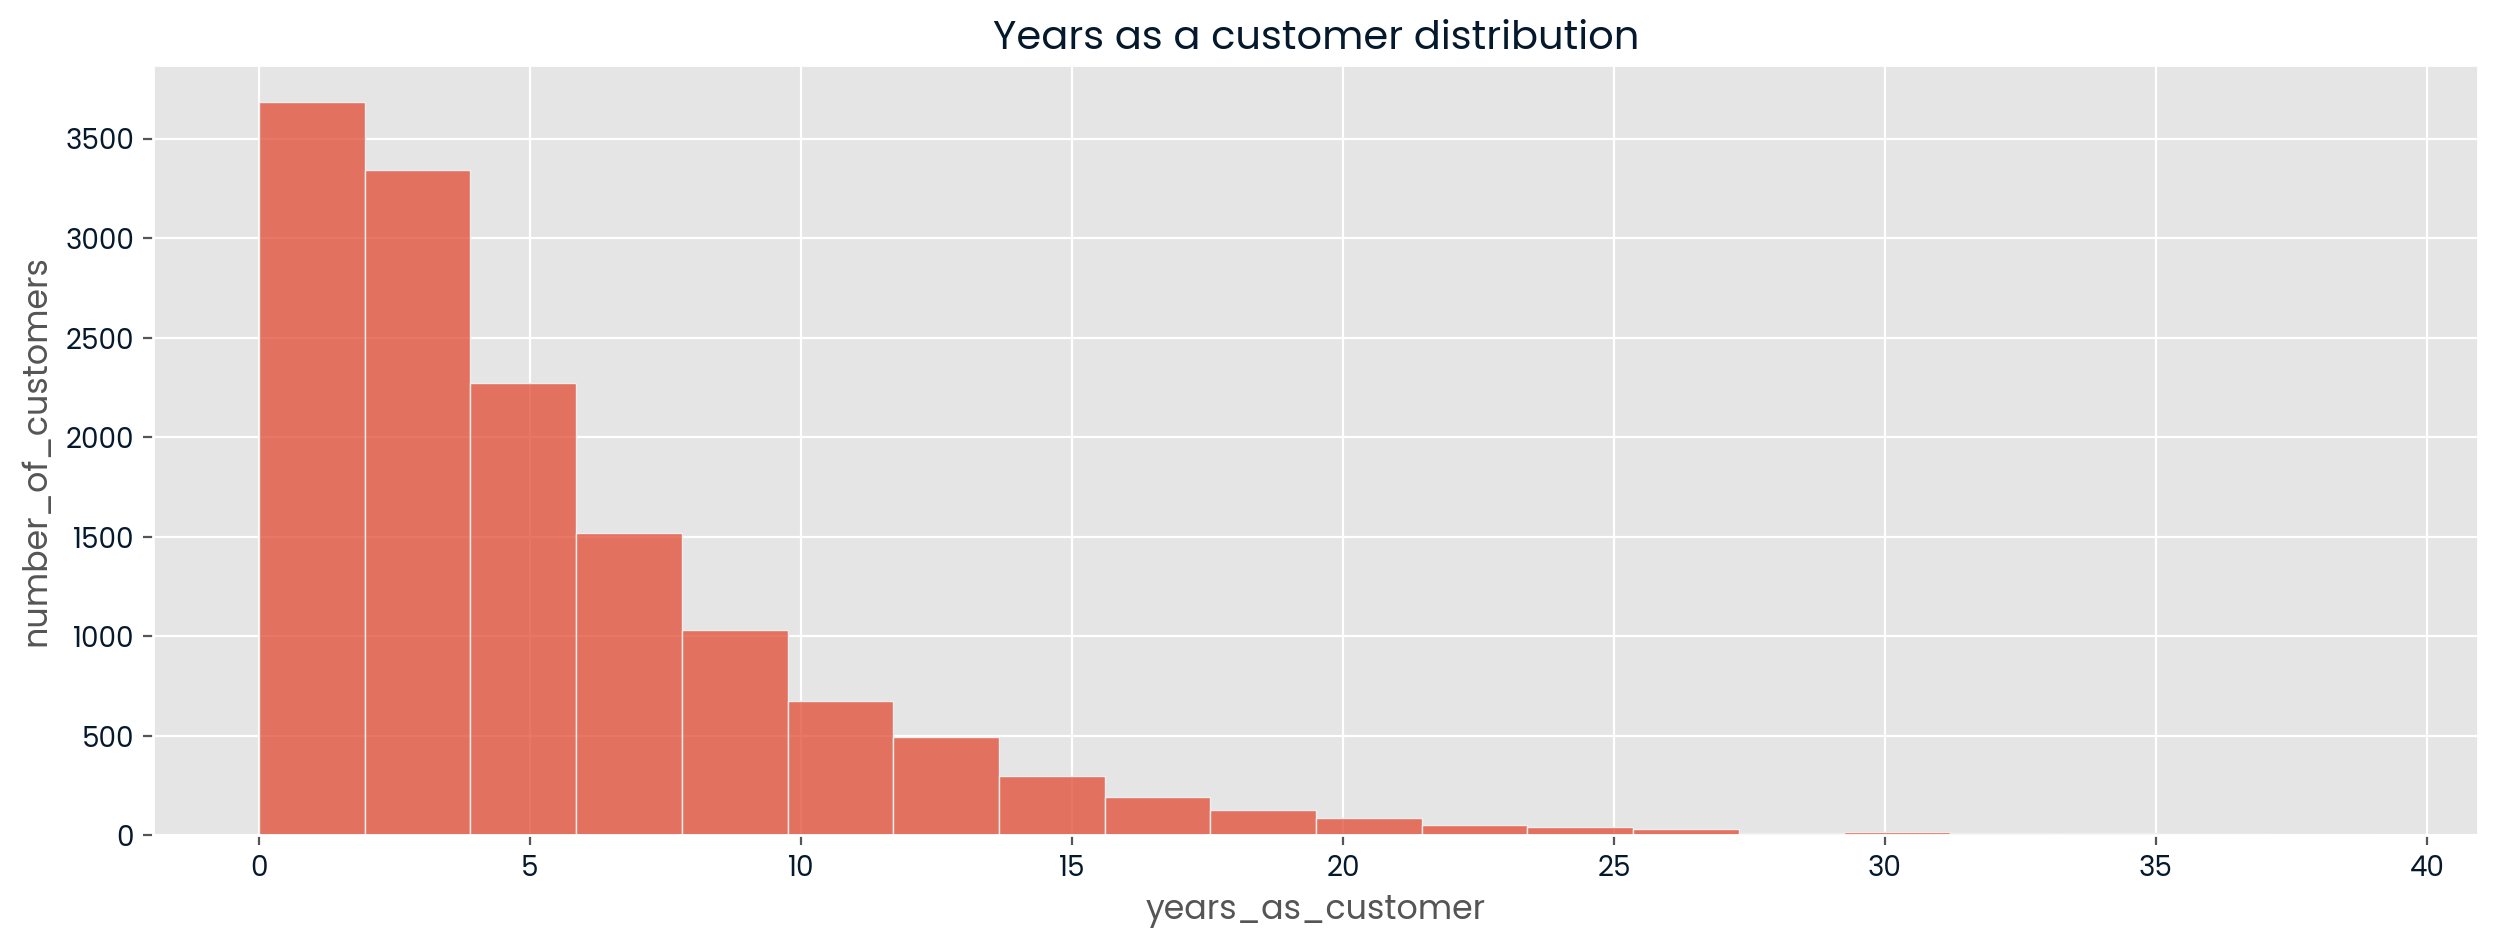

In [34]:
# Further investigating the suspecious column, years_as_customer
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
sns.histplot(x='years_as_customer', data=df, bins=20)
plt.title('Years as a customer distribution')
plt.ylabel('number_of_customers')
# From the graph we can notice that the distribution of this column is extremely right-skewed
# We also notice that the largest portion of customers fall under 1 year category, followed by 2 then 3 years

Text(0, 0.5, 'num_of_orders')

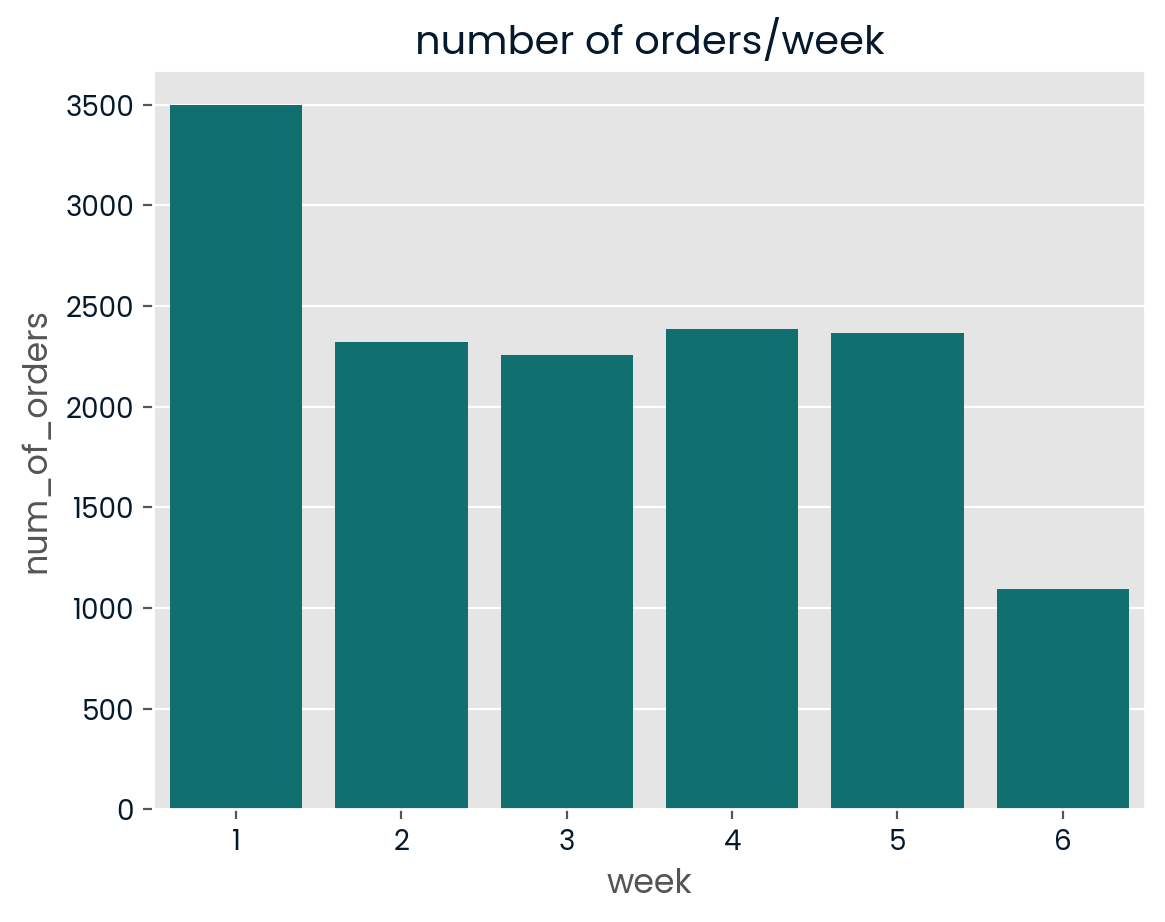

In [35]:
# Checking the distribution of the week column
sns.countplot(x='week', data=df, color='teal')
plt.title('number of orders/week')
plt.ylabel('num_of_orders')
# We notice that the largest portion of customers fall under 1 week category followed by 4 then 5 weeks

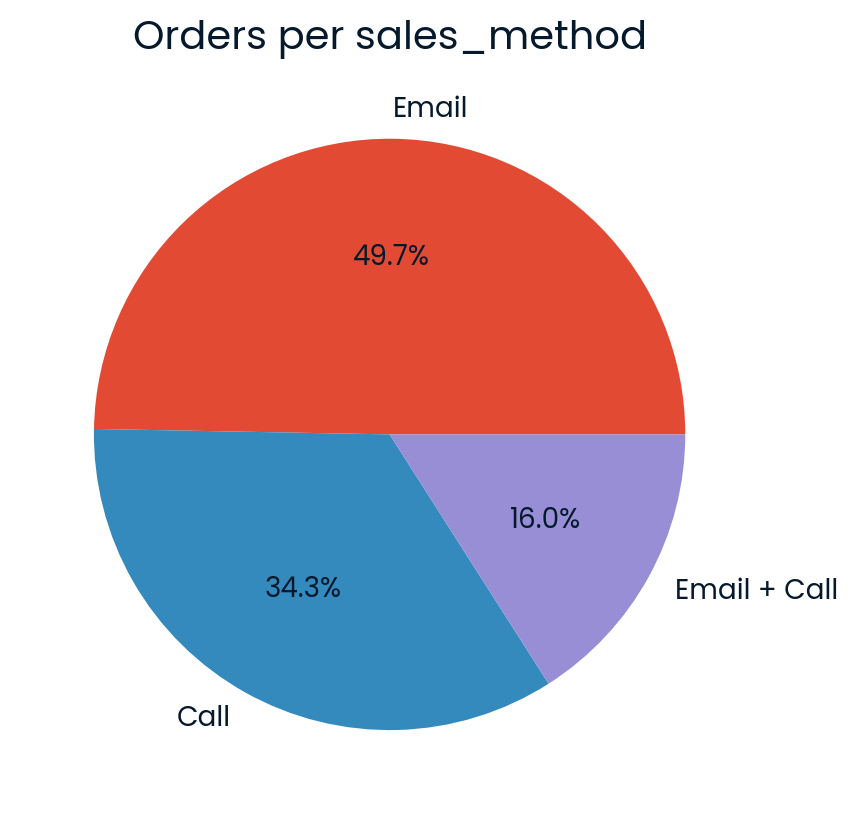

In [36]:
# Checking the distribution of the sales_method column
plt.pie(df['sales_method'].value_counts(), labels=['Email', 'Call', 'Email + Call'],autopct='%1.1f%%')
plt.title('Orders per sales_method')
plt.show()
# We notice that Email is the most popular mean of communication followed by Call 

Text(0.5, 1.0, 'number_of_units distribution')

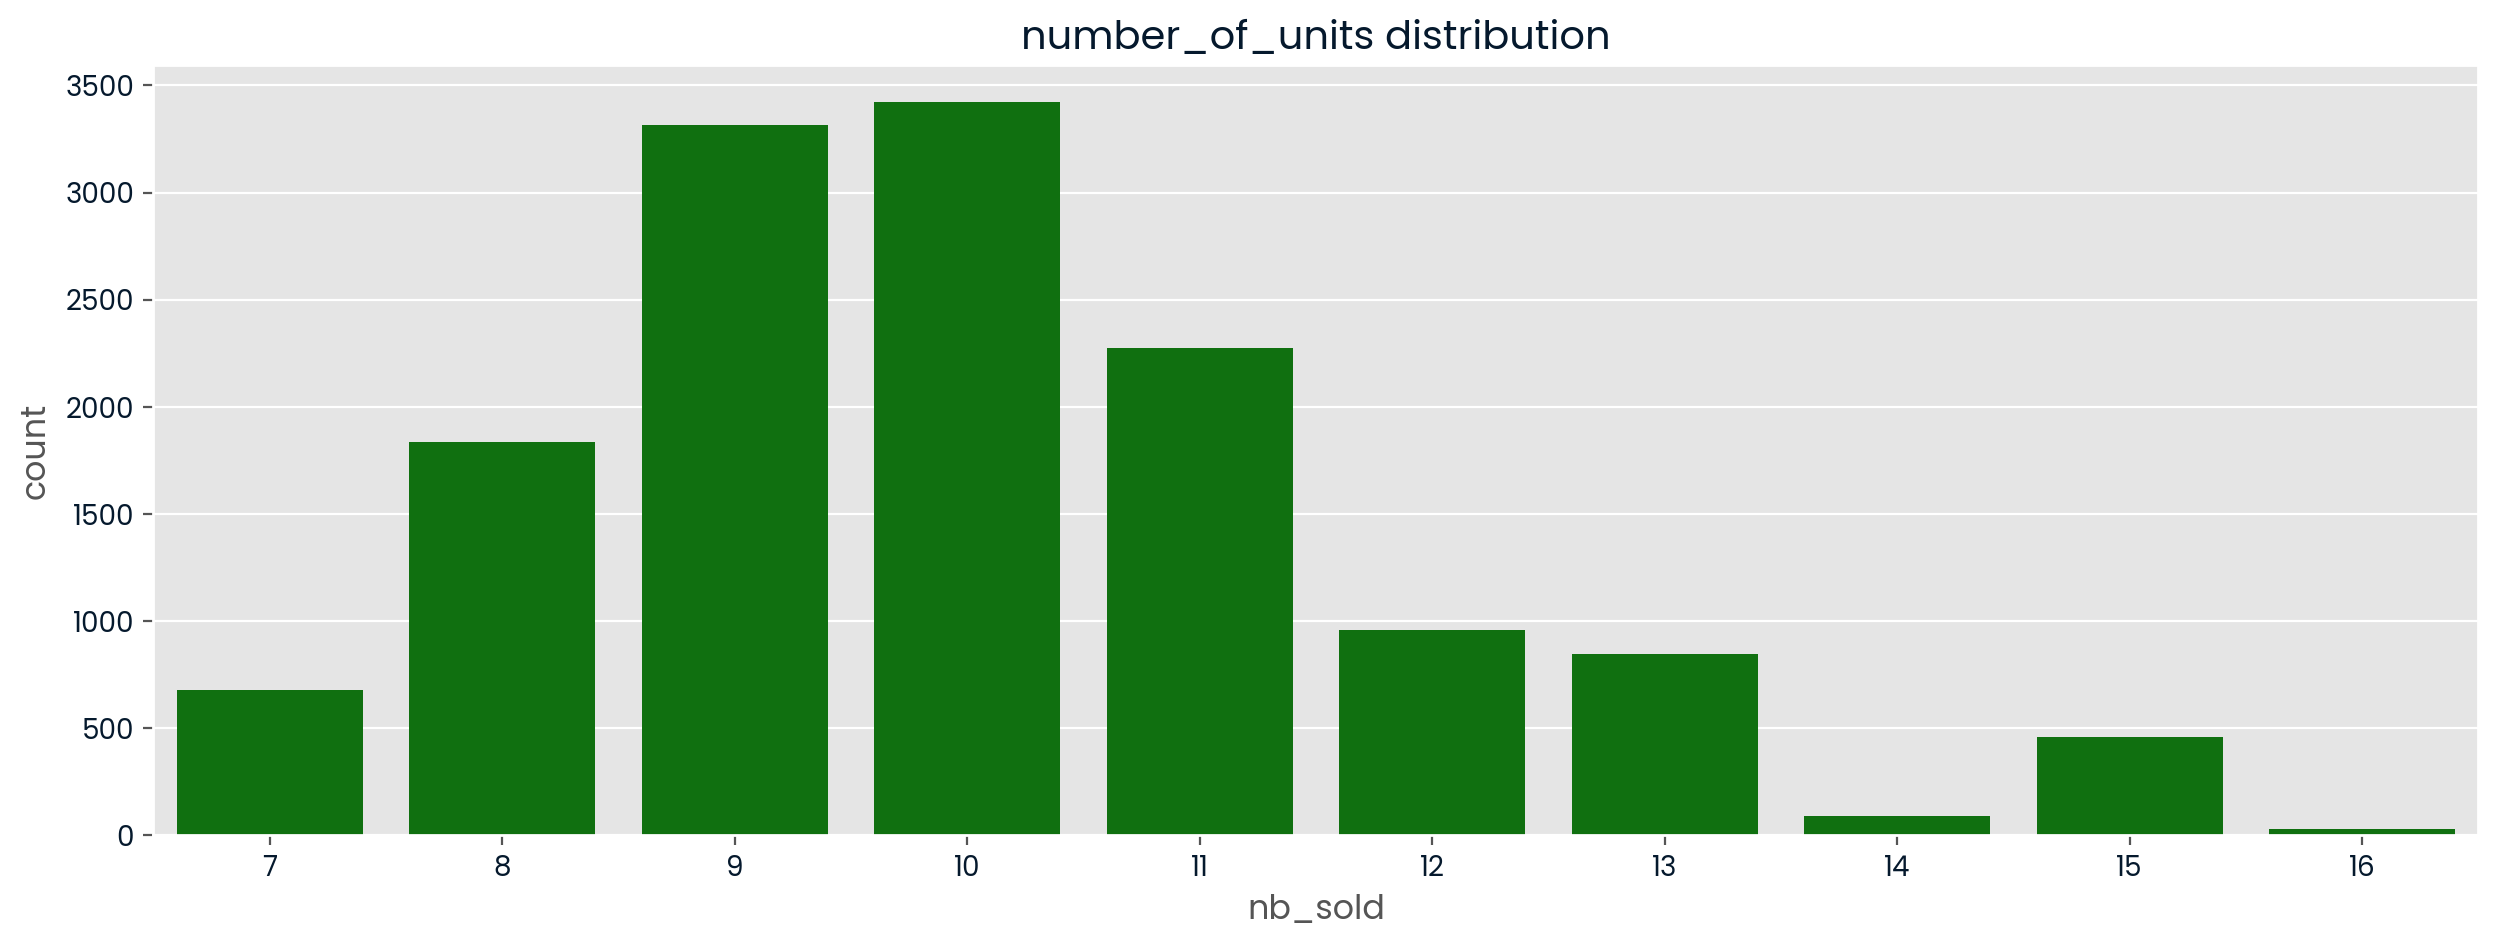

In [37]:
# Checking the distribution of the nb_sold column
plt.figure(figsize=(15, 5))
sns.countplot(x='nb_sold', data=df, color='green')
plt.title('number_of_units distribution')
# We notice that 10 is the most frequent number of units sold followed by 9 

Text(0.5, 1.0, 'number of orders per state')

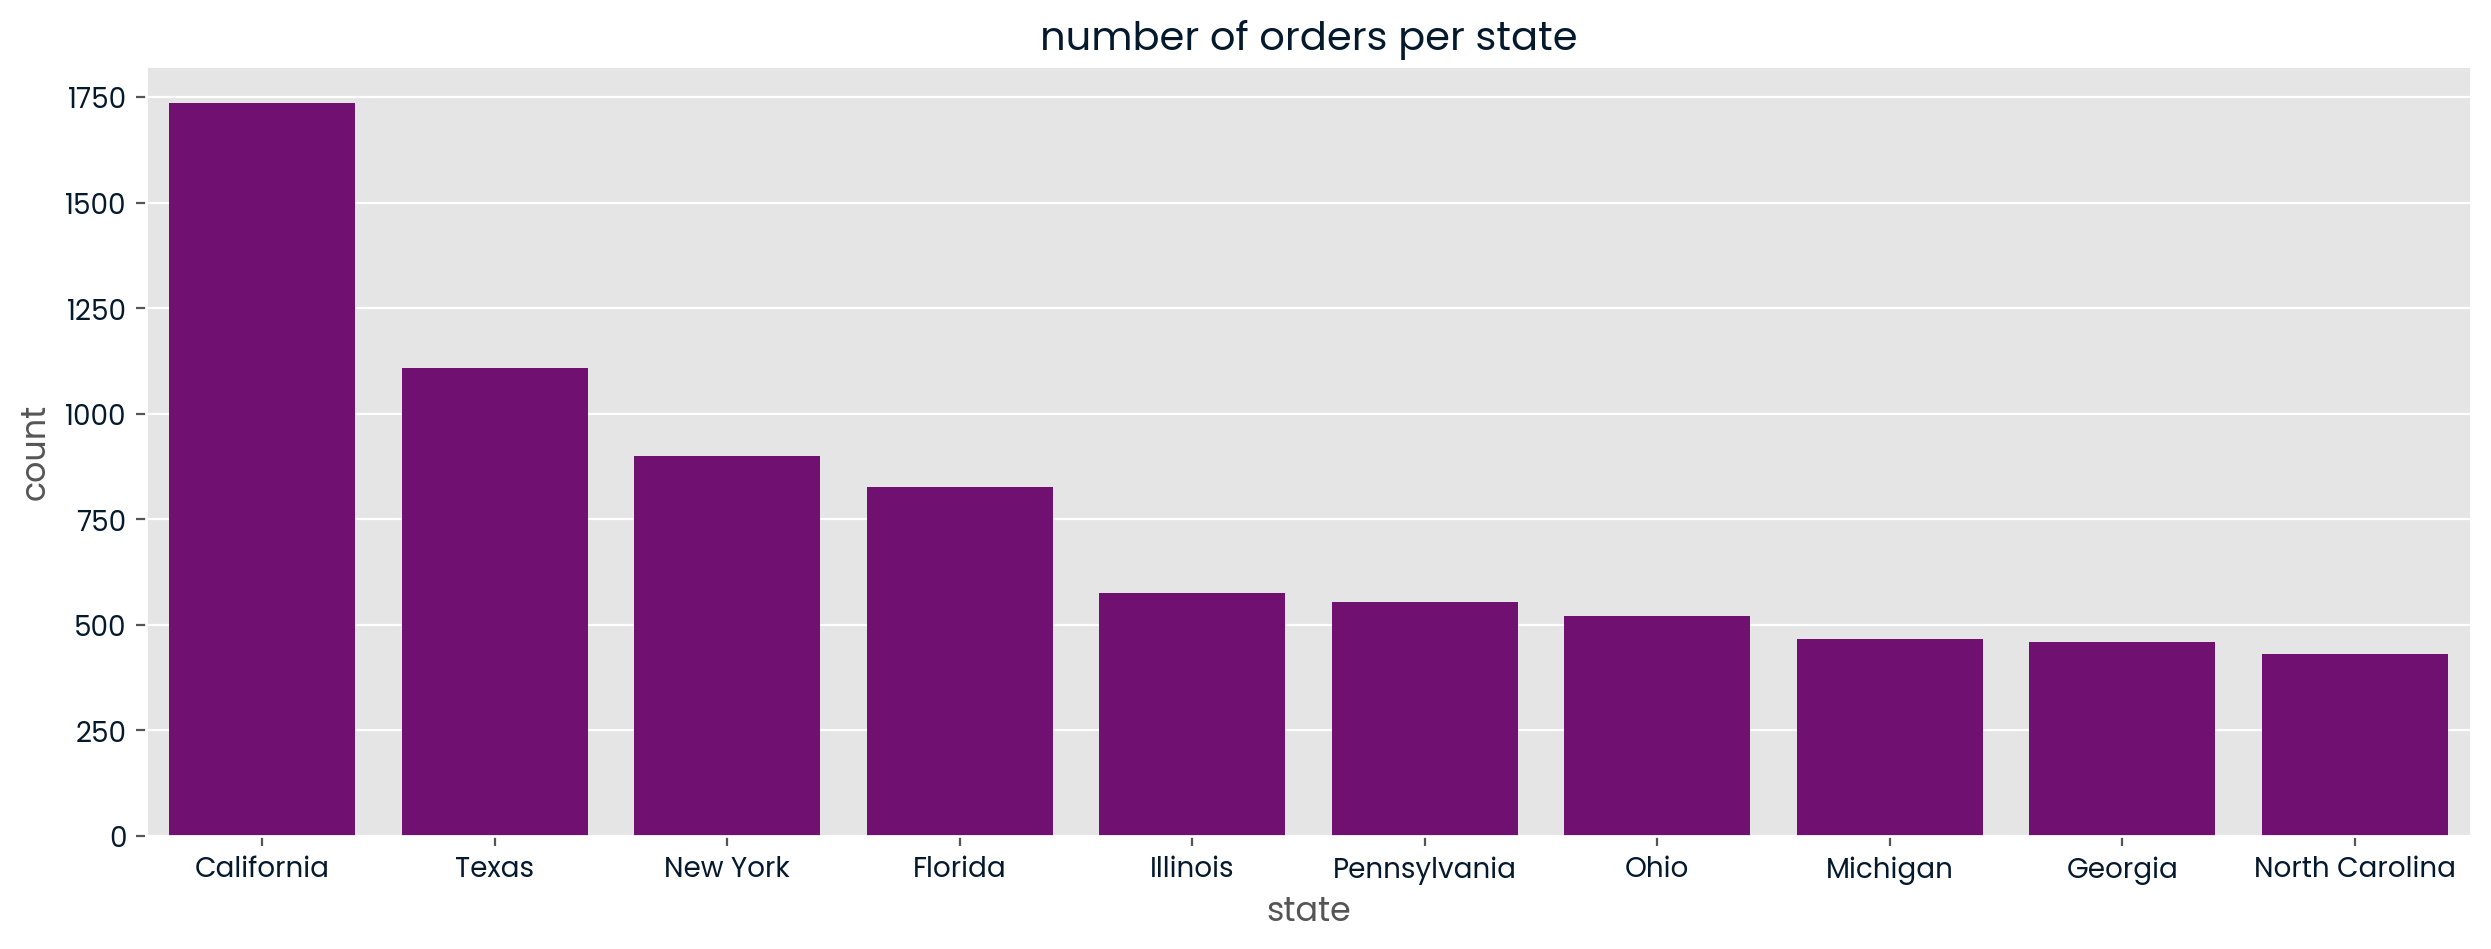

In [38]:
# Checking the distribution of the state column
plt.figure(figsize=(15, 5))
sns.countplot(x='state', data=df, color='purple', order=df['state'].value_counts().sort_values(ascending=False).index[:10])
plt.title('number of orders per state')
# We notice that California is has the largest number of orders followed by Texas then New York

Text(0.5, 1.0, 'median revenue per sales_method')

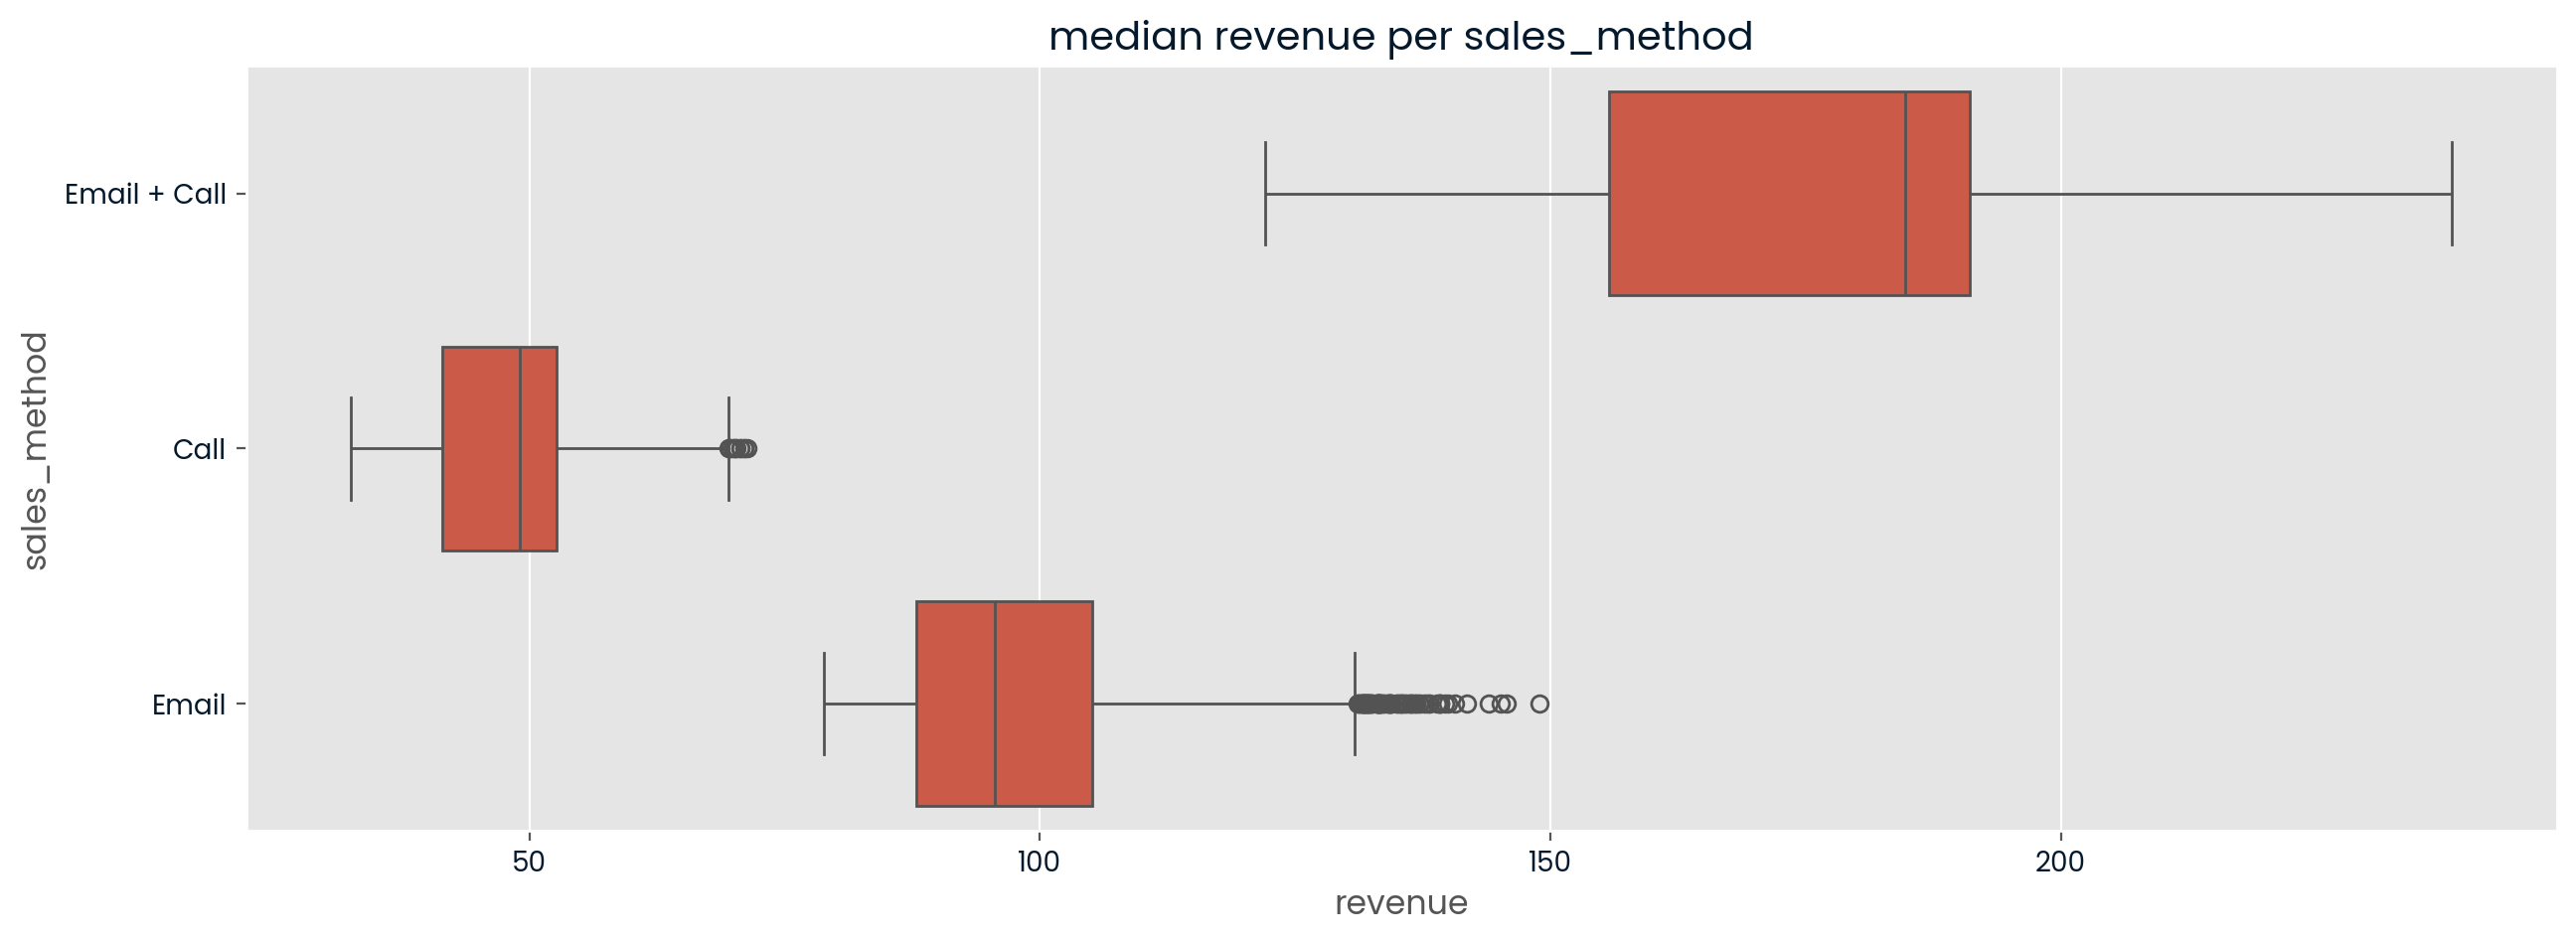

In [39]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='revenue', y='sales_method', data=df)
plt.title('median revenue per sales_method')
# We notice that Email + Call method has the heighest median revenue between all methods followed by Email

<AxesSubplot: xlabel='week', ylabel='revenue'>

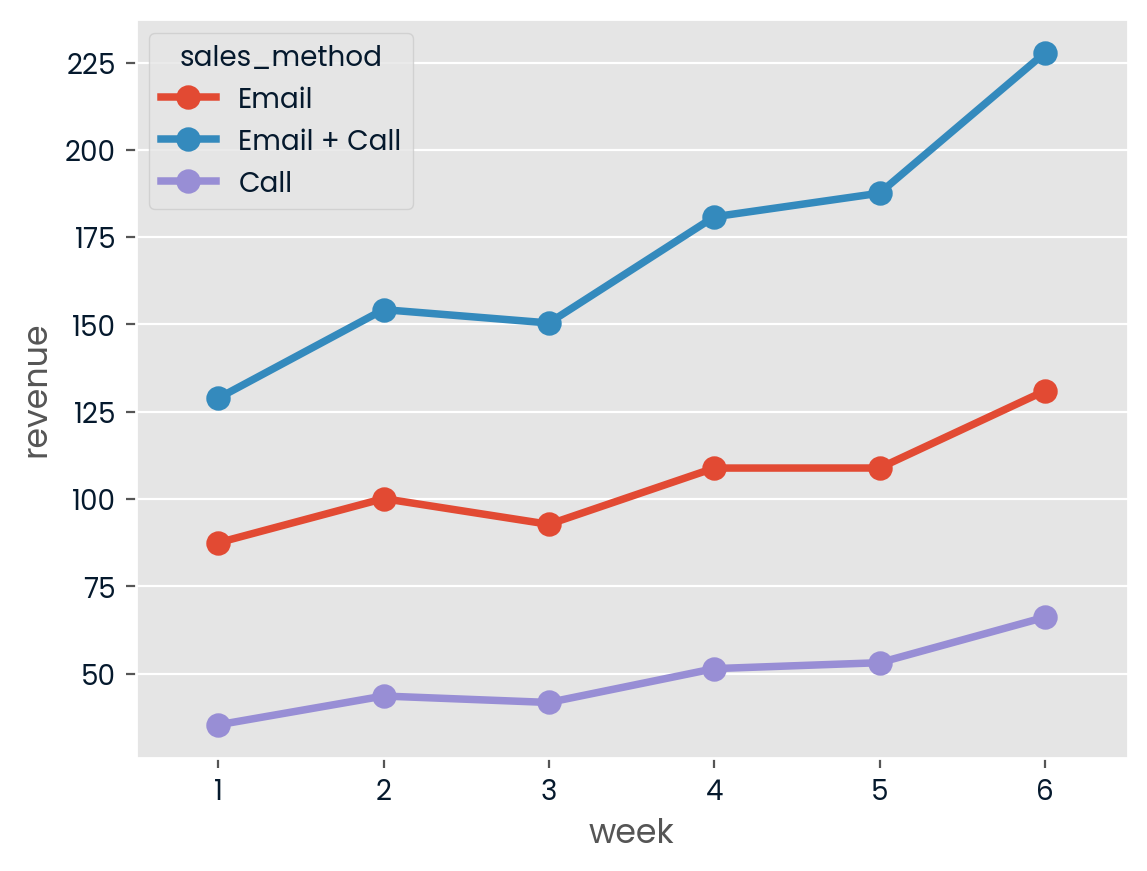

In [40]:
# Average weekly revenue
sns.pointplot(x='week', y='revenue', data=df, errorbar=None, hue='sales_method')

<AxesSubplot: xlabel='week', ylabel='revenue'>

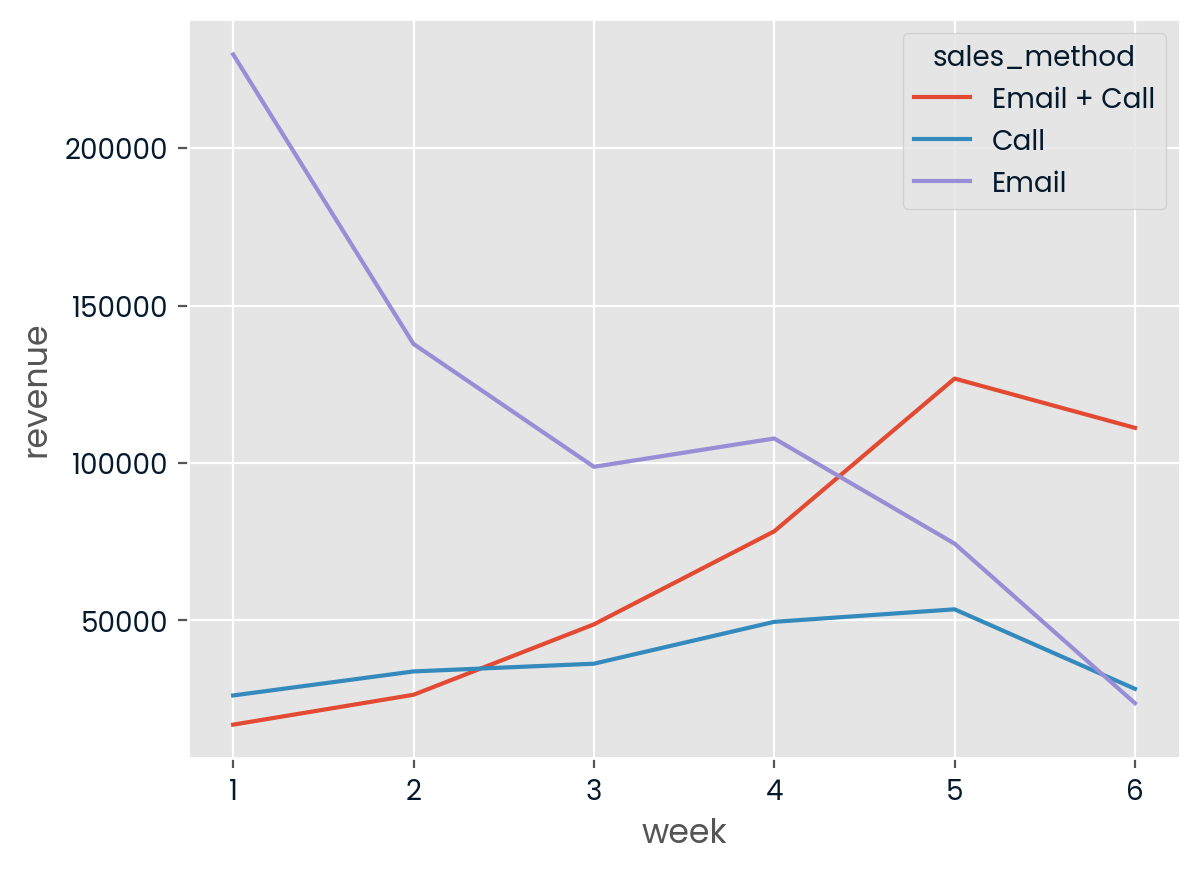

In [41]:
# Total sales over time across sales_method
sns.lineplot(x='week', y='revenue', estimator=sum, data=df, hue='sales_method')

Text(0.5, 1.0, 'total_sales per state')

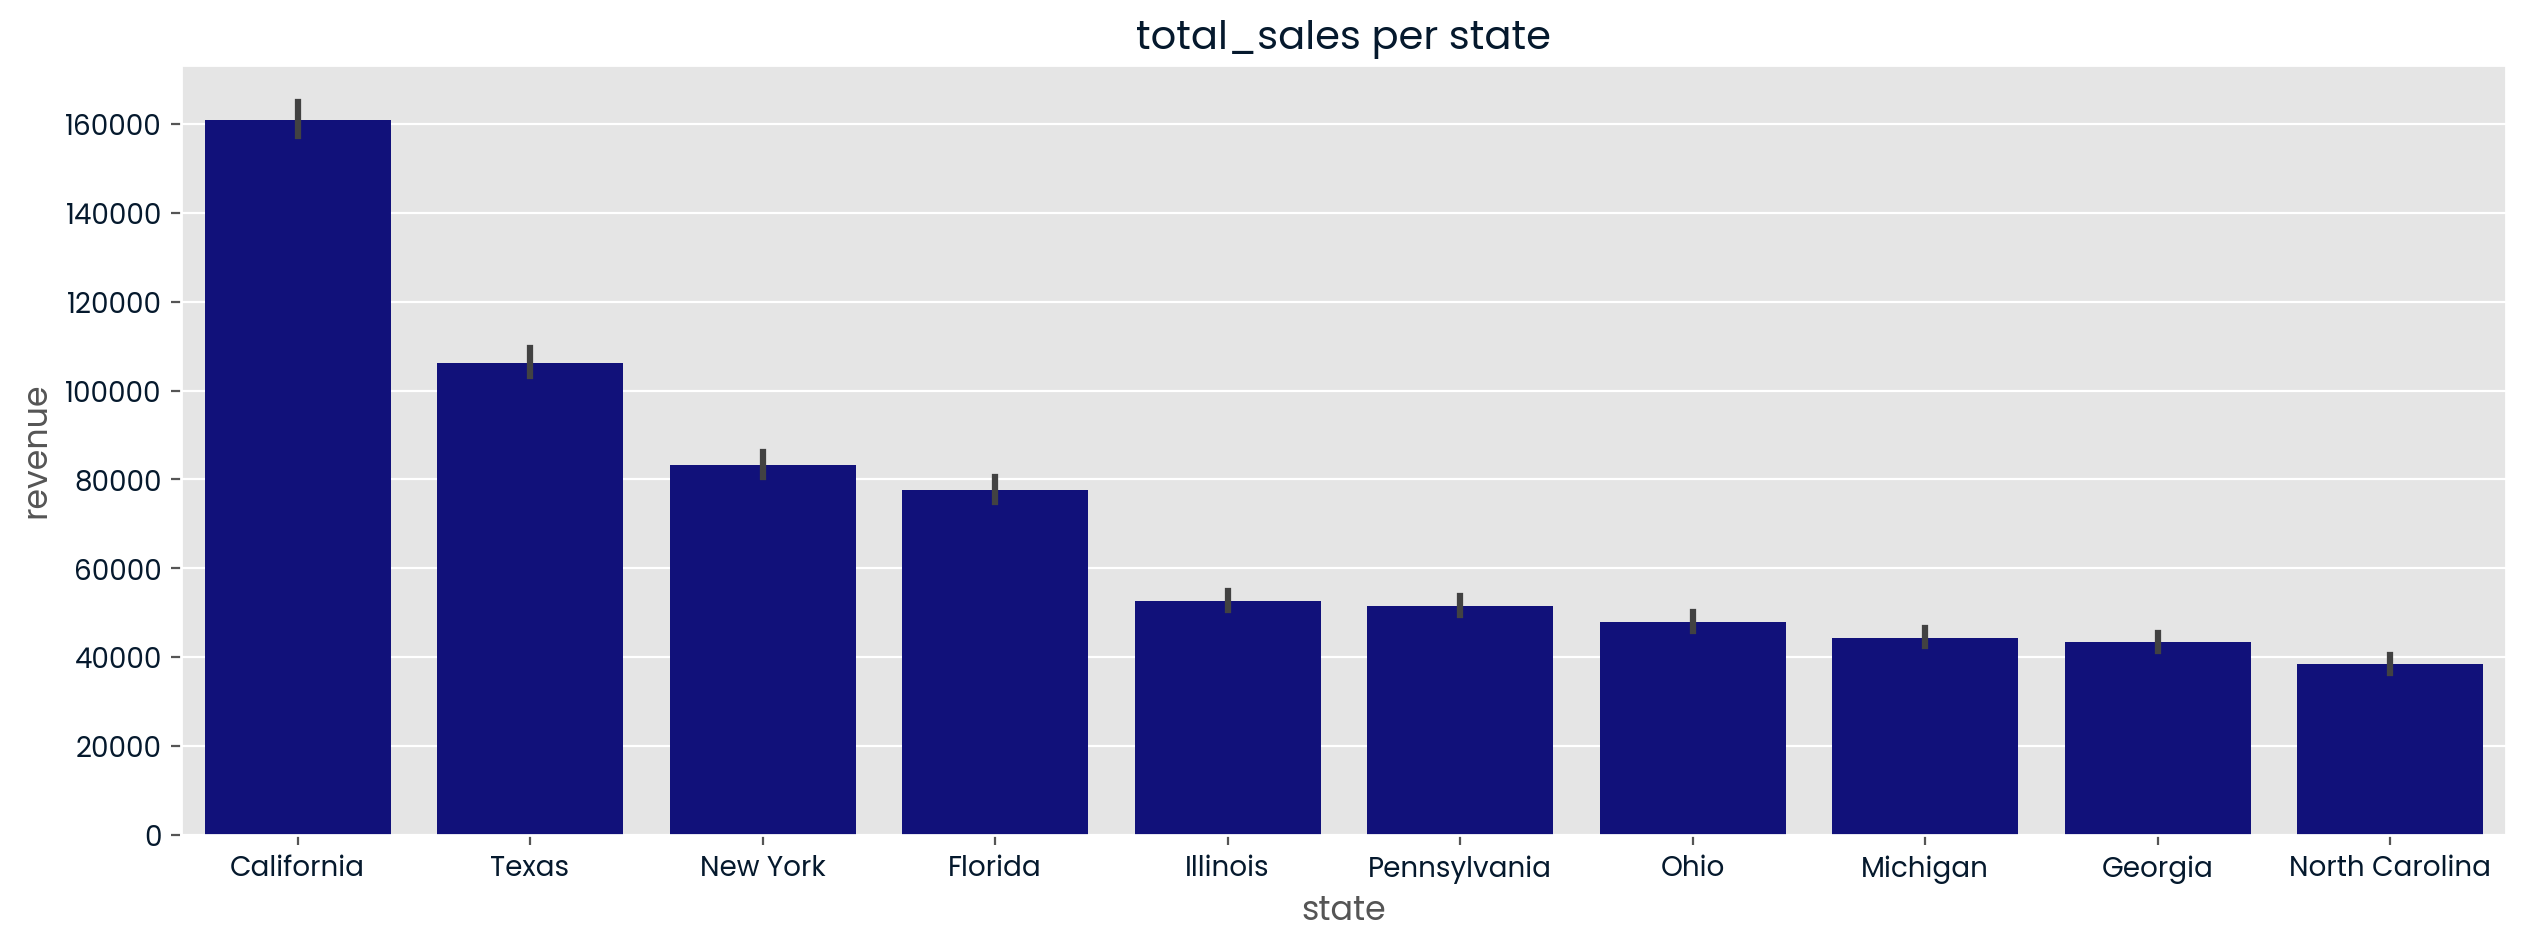

In [42]:
# 10 heighest states in terms of total revenue
plt.figure(figsize=(15, 5))
sns.barplot(x='state', y='revenue', estimator=sum, order=df.groupby('state')['revenue'].sum().sort_values(ascending=False).index[:10], data=df, color='darkblue')
plt.title('total_sales per state')

Text(0.5, 1.0, 'median num_site_visits per week')

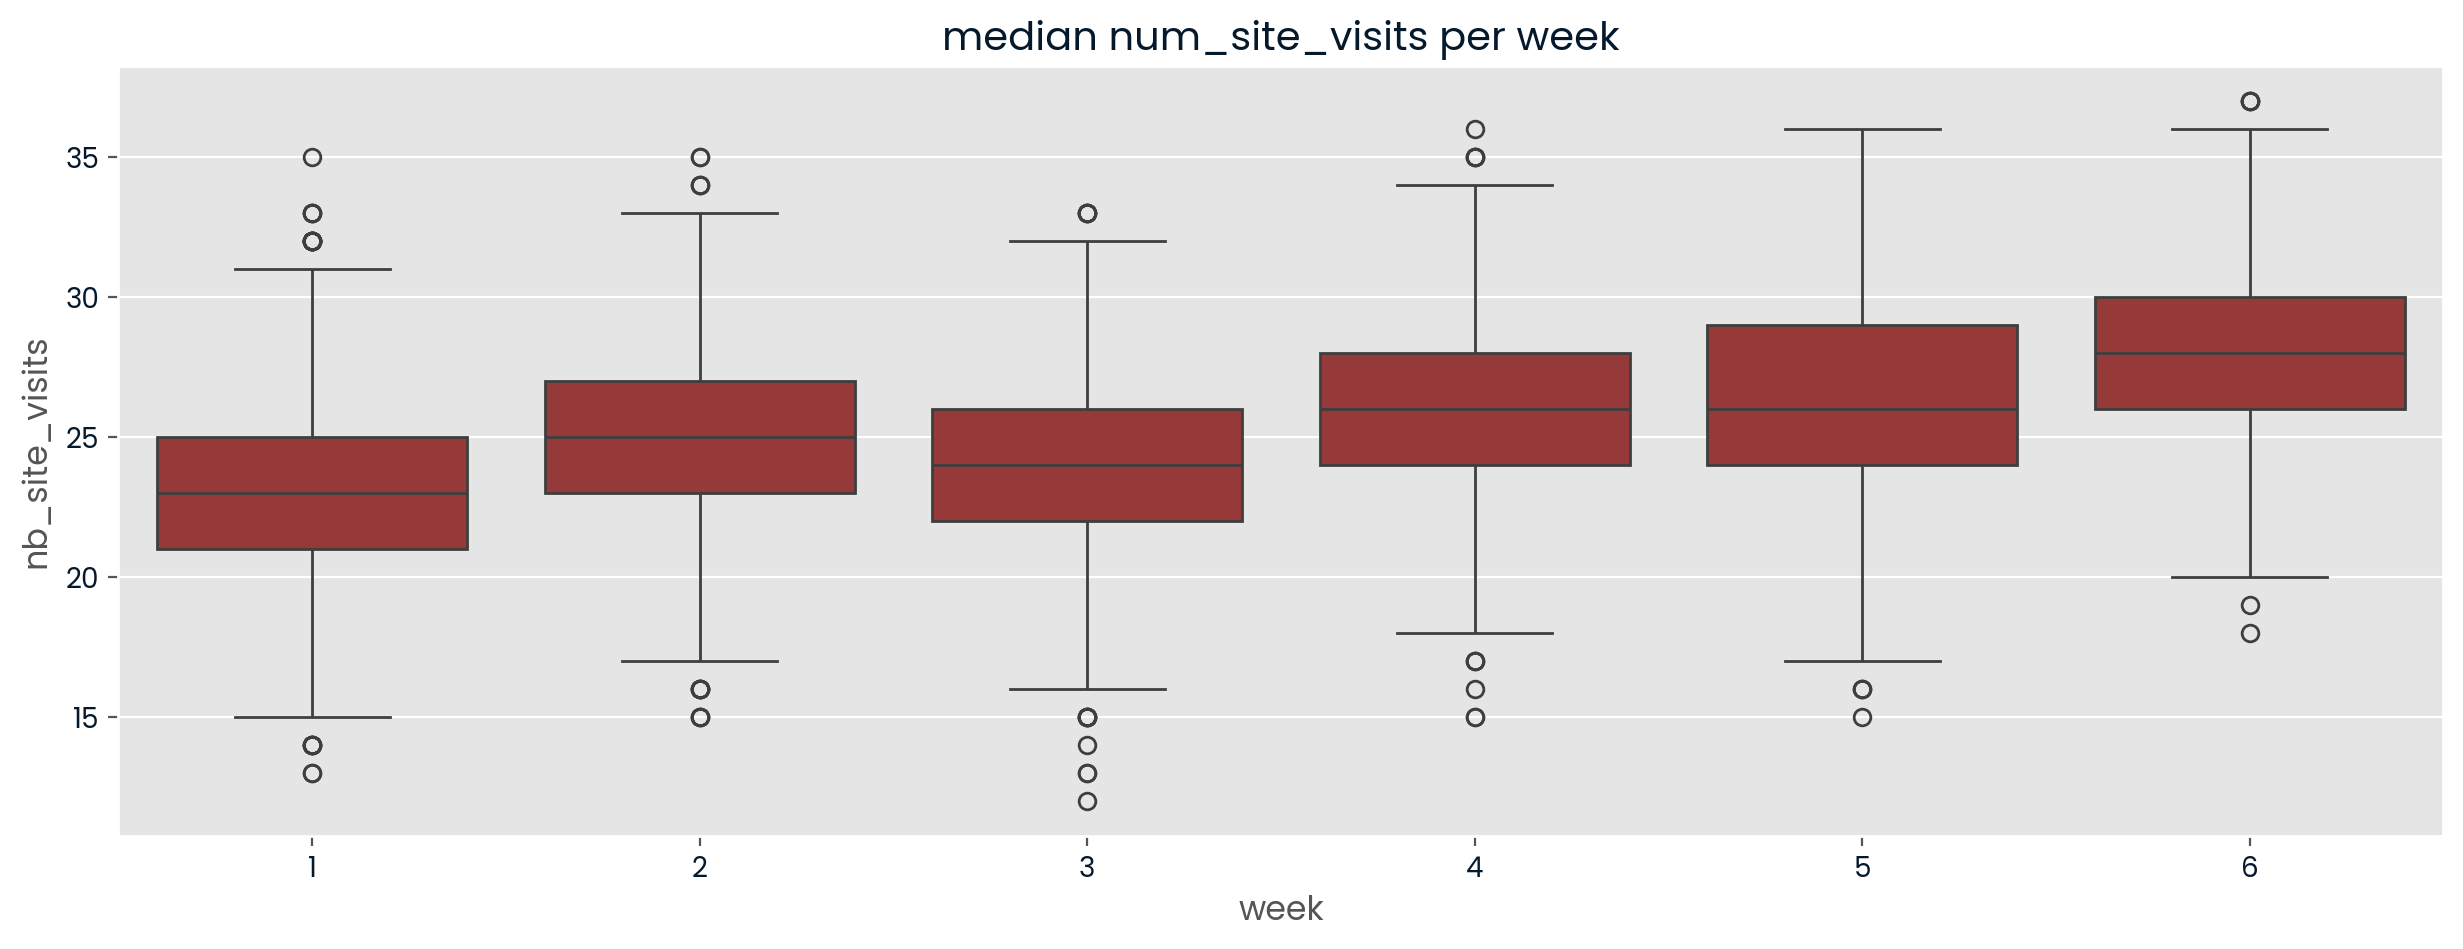

In [43]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='week', y='nb_site_visits', data=df, color='brown')
plt.title('median num_site_visits per week')
# We notice that week 6 had the heighest median of nb_site_visits between all weeks followed by week 5

In [44]:
df.groupby('week')['revenue'].mean().round(2)

week
1     78.01
2     85.26
3     81.43
4     98.75
5    107.65
6    148.82
Name: revenue, dtype: float64

Data Valdation: after the initial check we noticed some problems in the data and fixed them as follows
- ***sales_method*** column had values with inconsistent spelling and capitalization and we mapped them correctly
- ***revenue*** column had null values and we imputed them with the mean value



EDA: after cleaning the data we started to explore the trends in the data using deffirent charts and we came up with the following insights
- week 1 had the heighest number of orders followed by week 4
- the most popular communication method was Email followed by Call
- ***Email + Call*** method had the heighest median revenue between all methods followed by ***Email***
- our customers are multipack buyers with 10 as the most frequent number of units bought followed by 9 
- the largest portion of customers fall under 1 year category, followed by 2 then 3 years-as-customer
- week 6 had the heighest median nb_site_visits between all weeks followed by week 5
- the state of California is the one with the heighest total sales between all followed by Texas then New York


The metric we will use here will be ***Average weekly revenue***, we will use it as a measure of progress, and we will be using the results above as a baseline estimate.

Finally: based on our findings I think the following recommendations will be a suitable course of action to increase sales
- We use the Email + Call as the primary communication method besides other methods
- We create a marketing strategy that focuses on the states with low revenue
- We target the individuals with the heighest number of orders and incentevize them with offers to generate even more revenue
- We target the loyal customers with 7 or older years-as-customer to prevent them from churning and increase revenue

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation